**Chuẩn bị các thư viện**

In [11]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Binning Transform
 Binning là kỹ thuật phân loại các giá trị liên tục thành các khoảng (bins). Quá trình này giúp biến đổi dữ liệu liên tục thành dữ liệu rời rạc. Mục đích của binning là làm giảm độ nhiễu của dữ liệu, đơn giản hóa phân tích, và giúp mô hình dễ dàng học hơn khi dữ liệu được phân loại.

### Cú pháp
Sử dụng pd.cut (chia theo khoảng giá trị cố định):

  ```python
  pd.cut(x, bins, lables) 
  ```
Sử dụng pd.qcut (chia theo phân vị):

  ```python
  pd.qcut(x, q, labels)
  ```

  * x: Dữ liệu cần chia
  * bins: theo giá trị gắn cứng
  * q: Số lượng khoảng hoặc danh sách các phân vị.
  * labels (tùy chọn): tên cho các khoảng


In [12]:
# Chuẩn bị dữ liệu
df = pd.DataFrame({'Math': [4, 4, 7, 8, 12, 13, 15, 18, 22, 23, 23, 25],
                   'Eng': [2, 5, 4, 7, 7, 8, 5, 4, 5, 11, 13, 8]})
df

,Math,Eng
0,4,2
1,4,5
2,7,4
3,8,7
4,12,7
5,13,8
6,15,5
7,18,4
8,22,5
9,23,11


In [13]:
# Chia dữ liệu Math thành 5 khoảng rồi lưu vào bin1
df['bin1'] = pd.qcut(df['Math'], q=5)

print(df)

print("\nXem số lượng giá trị nằm trong từng khoảng:")
print(df['bin1'].value_counts())



    Math  Eng          bin1
0      4    2  (3.999, 7.2]
1      4    5  (3.999, 7.2]
2      7    4  (3.999, 7.2]
3      8    7   (7.2, 12.4]
4     12    7   (7.2, 12.4]
5     13    8  (12.4, 16.8]
6     15    5  (12.4, 16.8]
7     18    4  (16.8, 22.8]
8     22    5  (16.8, 22.8]
9     23   11  (22.8, 25.0]
10    23   13  (22.8, 25.0]
11    25    8  (22.8, 25.0]

Xem số lượng giá trị nằm trong từng khoảng:
bin1
(3.999, 7.2]    3
(22.8, 25.0]    3
(7.2, 12.4]     2
(12.4, 16.8]    2
(16.8, 22.8]    2
Name: count, dtype: int64


In [14]:
# Chia Math thành 5 khoảng phân vị:
# 0 - 20%, 20% - 40%, 40% - 60%, 60% - 80%, 80% - 100%
# rồi lưu vào bin2
df['bin2'] = pd.qcut(df['Math'], q=[0, .2, .4, .6, .8, 1])
df

,Math,Eng,bin1,bin2
0,4,2,"(3.999, 7.2]","(3.999, 7.2]"
1,4,5,"(3.999, 7.2]","(3.999, 7.2]"
2,7,4,"(3.999, 7.2]","(3.999, 7.2]"
3,8,7,"(7.2, 12.4]","(7.2, 12.4]"
4,12,7,"(7.2, 12.4]","(7.2, 12.4]"
5,13,8,"(12.4, 16.8]","(12.4, 16.8]"
6,15,5,"(12.4, 16.8]","(12.4, 16.8]"
7,18,4,"(16.8, 22.8]","(16.8, 22.8]"
8,22,5,"(16.8, 22.8]","(16.8, 22.8]"
9,23,11,"(22.8, 25.0]","(22.8, 25.0]"


In [15]:
# Chia Math thành 5 khoảng phân vị:
# 0 - 20%, 20% - 40%, 40% - 60%, 60% - 80%, 80% - 100%
# và đặt tên các khoảng đó theo danh labels.
# Sau đó lưu vào cột bin3

df['bin3'] = pd.qcut(df['Math'],
                           q=[0, .2, .4, .6, .8, 1],
                           labels=['A', 'B', 'C', 'D', 'E'])
df

,Math,Eng,bin1,bin2,bin3
0,4,2,"(3.999, 7.2]","(3.999, 7.2]",A
1,4,5,"(3.999, 7.2]","(3.999, 7.2]",A
2,7,4,"(3.999, 7.2]","(3.999, 7.2]",A
3,8,7,"(7.2, 12.4]","(7.2, 12.4]",B
4,12,7,"(7.2, 12.4]","(7.2, 12.4]",B
5,13,8,"(12.4, 16.8]","(12.4, 16.8]",C
6,15,5,"(12.4, 16.8]","(12.4, 16.8]",C
7,18,4,"(16.8, 22.8]","(16.8, 22.8]",D
8,22,5,"(16.8, 22.8]","(16.8, 22.8]",D
9,23,11,"(22.8, 25.0]","(22.8, 25.0]",E


In [16]:
# Chia các khoảng theo giá trị cố định và đặt
# tên các khoảng đó theo danh sách labels, sau
# đó gán vào cột bin4

df['bin4'] = pd.cut(df['Eng'],
                      bins=[0, 5, 8, float('Inf')],
                      labels=['Bad', 'OK', 'Good'])

print(df)
print("\nXem số lượng giá trị nằm trong từng khoảng:")
print(df['bin4'].value_counts())

    Math  Eng          bin1          bin2 bin3  bin4
0      4    2  (3.999, 7.2]  (3.999, 7.2]    A   Bad
1      4    5  (3.999, 7.2]  (3.999, 7.2]    A   Bad
2      7    4  (3.999, 7.2]  (3.999, 7.2]    A   Bad
3      8    7   (7.2, 12.4]   (7.2, 12.4]    B    OK
4     12    7   (7.2, 12.4]   (7.2, 12.4]    B    OK
5     13    8  (12.4, 16.8]  (12.4, 16.8]    C    OK
6     15    5  (12.4, 16.8]  (12.4, 16.8]    C   Bad
7     18    4  (16.8, 22.8]  (16.8, 22.8]    D   Bad
8     22    5  (16.8, 22.8]  (16.8, 22.8]    D   Bad
9     23   11  (22.8, 25.0]  (22.8, 25.0]    E  Good
10    23   13  (22.8, 25.0]  (22.8, 25.0]    E  Good
11    25    8  (22.8, 25.0]  (22.8, 25.0]    E    OK

Xem số lượng giá trị nằm trong từng khoảng:
bin4
Bad     6
OK      4
Good    2
Name: count, dtype: int64


# Qualitative to Quantitative Transformation (Chuyển đổi từ định tính sang định lượng)
Chuyển đổi dữ liệu định tính (categorical) sang định lượng (quantitative) là quá trình biến đổi các giá trị phân loại thành các giá trị số, giúp dữ liệu có thể xử lý trong các mô hình học máy và phân tích. Dữ liệu định tính thường không có giá trị số và có thể ở dạng văn bản, như tên quốc gia, màu sắc, v.v.

### Cú Pháp
* Cách 1: Label Encoding (Nhãn hóa): Chuyển đổi các giá trị phân loại thành các số nguyên (0, 1, 2, ...). Cách này đơn giản và phù hợp khi các nhãn có thể được hiểu theo thứ tự. Tuy nhiên, nếu không có ý nghĩa thứ tự thì có thể gây nhầm lẫn cho mô hình.

  ```python
  label_encoder = preprocessing.LabelEncoder()
  df['label_column'] = label_encoder.fit_transform(df['original_column'])
  ```
* Cách 2: One-Hot Encoding (Boolean hóa): Chuyển đổi mỗi giá trị phân loại thành các cột nhị phân (0 hoặc 1). Kỹ thuật này phù hợp khi không có ý nghĩa thứ tự giữa các giá trị phân loại. Các cột mới sẽ đại diện cho mỗi giá trị phân loại và có giá trị 0 hoặc 1 tùy theo sự hiện diện.

  ```python
  df_encoded = pd.get_dummies(df['original_column'], prefix='category')
  ```
* Cách 3: Vector hóa (Binarization): Chuyển đổi các giá trị phân loại thành các vector nhị phân (mỗi hàng là một vector chứa giá trị 0 hoặc 1). Đây là một dạng binarization, rất hữu ích cho dữ liệu phân loại đa nhãn (multi-class classification).
  ```python
  # Sử dụng LabelBinarizer để vector hóa
  y = LabelBinarizer().fit_transform(df['original_column'])
  # Sử dụng OneHotEncoder
  y = OneHotEncoder().fit_transform(df[['original_column']]).toarray()
  ```

### Vector hóa
vector hóa rất hữu dụng cho machine learning, đặc biệt trong việc xử lý dữ liệu định tính và văn bản. 

In [17]:
# Chuẩn bị dữ liệu
gdp = [11, 22, 33, 44, 55, 66, 77]
countries = ['Spain', 'France', 'Spain', 'Germany', 'France']
df = pd.DataFrame(list(zip(gdp, countries)),
                  columns=['GDP', 'Countries'])
df

,GDP,Countries
0,11,Spain
1,22,France
2,33,Spain
3,44,Germany
4,55,France


In [18]:
# Nhãn hóa (Label Encoding)
# Phân loại countries theo nhãn 
label_encoder = preprocessing.LabelEncoder()
df['labelCountries']= label_encoder.fit_transform(df['Countries']) 
df

,GDP,Countries,labelCountries
0,11,Spain,2
1,22,France,0
2,33,Spain,2
3,44,Germany,1
4,55,France,0


In [19]:
# Boolean Hóa (One-Hot Encoding)
# Phân loại countries đúng theo cột thì true, còn lại false
dfOneHotEncoding = pd.get_dummies(df.Countries, prefix='Country')
print(dfOneHotEncoding.head())
df = pd.concat([df, dfOneHotEncoding], axis=1)
df


   Country_France  Country_Germany  Country_Spain
0           False            False           True
1            True            False          False
2           False            False           True
3           False             True          False
4            True            False          False


,GDP,Countries,labelCountries,Country_France,Country_Germany,Country_Spain
0,11,Spain,2,False,False,True
1,22,France,0,True,False,False
2,33,Spain,2,False,False,True
3,44,Germany,1,False,True,False
4,55,France,0,True,False,False


In [20]:
# Vector hóa (Binarization):
y = LabelBinarizer().fit_transform(df["Countries"])
print("Sử dụng LabelBinarizer để vector hóa:")
print(y)

y = OneHotEncoder().fit_transform(df[['Countries']]).toarray()
print("\nSử dụng OneHotEncoder để vector hóa:")
print(y)

Sử dụng LabelBinarizer để vector hóa:
[[0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]

Sử dụng OneHotEncoder để vector hóa:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


* **Câu hỏi 1: Khi nào biến đổi cột country thành vector**
  
  Khi không quan tâm đến thứ tự, độ lớn nhỏ của các giá trị: Ví dụ, các quốc gia như 'Spain', 'France', 'Germany' không có thứ tự về độ lớn, và chúng chỉ là các danh mục khác nhau, không thể so sánh trực tiếp về mặt số học. Trong trường hợp này, One-Hot Encoding sẽ được sử dụng để mã hóa mỗi quốc gia thành một vector nhị phân.

* **Câu hỏi 2: Khi nào biến đổi thành giá trị số cụ thể**
  
  Khi có ý nghĩa về thứ tự hoặc độ lớn: Nếu các giá trị phân loại có sự khác biệt về thứ tự hoặc tầm quan trọng (ví dụ, cấp độ từ 'low', 'medium', 'high'), thì việc chuyển thành số cụ thể sẽ có ý nghĩa. Tuy nhiên, đối với các quốc gia, việc gán số cụ thể không có ý nghĩa, trừ khi bạn có lý do đặc biệt.

# Chuẩn hóa giá trị tuyệt đối (MaxAbsScaler)
Max Abs Scaling là phương pháp chuẩn hóa dữ liệu bằng cách chia mỗi giá trị cho giá trị tuyệt đối lớn nhất trong từng đặc trưng. Điều này đảm bảo rằng các giá trị sau khi chuẩn hóa nằm trong khoảng [-1, 1].

# Công thức 
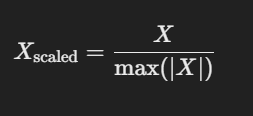

* X là giá trị ban đầu.
* max(|X|) là giá trị tuyệt đối lớn nhất trong tập dữ liệu.
* X_scaled là giá trị sau khi chuẩn hóa.

# Cú pháp
```python
# Khởi tạo MaxAbsScaler
scaler = MaxAbsScaler()

# Chuẩn hóa cột 'HCM' và 'LA'
scaled = scaler.fit_transform(df[['HCM', 'LA']])

# Tạo DataFrame từ kết quả chuẩn hóa
scaled_df = pd.DataFrame(scaled, columns=['HCM', 'LA'])

print(scaled_df)
```


In [21]:
# Chuẩn bị dữ liệu

year = [2010,2011,2012,2013,2014,2015]
salaryHCM = [8.5,9.0,10.5,12.0,11.0,10.0]
salaryLA = [5.5,6.0,6.0,5.5,6.0,5.0]
df = pd.DataFrame(list(zip(year, salaryHCM,salaryLA)),
                  columns=['Year', 'HCM','LA'])
df

,Year,HCM,LA
0,2010,8.5,5.5
1,2011,9.0,6.0
2,2012,10.5,6.0
3,2013,12.0,5.5
4,2014,11.0,6.0
5,2015,10.0,5.0


In [22]:
# Chuẩn hóa giá trị tuyệt đối thủ công

max_la = df['LA'].abs().max()
df['macLA'] = df['LA'] / max_la
df

,Year,HCM,LA,macLA
0,2010,8.5,5.5,0.916667
1,2011,9.0,6.0,1.000000
2,2012,10.5,6.0,1.000000
3,2013,12.0,5.5,0.916667
4,2014,11.0,6.0,1.000000
5,2015,10.0,5.0,0.833333


In [23]:
# Chuẩn hóa giá trị tuyệt đối bằng thư viện (NÊN DÙNG)

scaler = MaxAbsScaler()
scaled = scaler.fit_transform(df[['HCM','LA']])
scaled_df = pd.DataFrame(scaled, columns=df[['HCM','LA']].columns)
scaled_df

,HCM,LA
0,0.708333,0.916667
1,0.750000,1.000000
2,0.875000,1.000000
3,1.000000,0.916667
4,0.916667,1.000000
5,0.833333,0.833333


In [24]:
# Chuẩn hóa dựa trên giá trị tuyệt đối lớn nhất của các cột HCM và LA, 
# đã được tính trong bước scaler.fit_transform(df[['HCM', 'LA']]).
vSc = scaler.transform([[4.5,5.75]])
vSc

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


array([[0.375     , 0.95833333]])

In [25]:
# Biến đổi giá trị đã chuẩn hóa trở lại giá trị thực tế ban đầu, dựa trên giá 
# trị tuyệt đối lớn nhất của HCM và LA.
vR = scaler.inverse_transform([[0.5,0.8]])
vR

array([[6. , 4.8]])

# Chuẩn hóa Min-Max (MinMaxScaler)
Min-Max Scaling là phương pháp chuẩn hóa dữ liệu bằng cách chuyển đổi các giá trị về một khoảng xác định (thường là từ 0 đến 1). Phương pháp này duy trì mối quan hệ tỷ lệ giữa các giá trị trong khi đưa chúng về một phạm vi chuẩn để dễ dàng sử dụng trong các mô hình học máy.

### Công thức
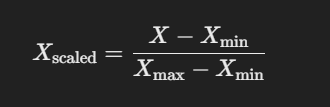

* X: Giá trị ban đầu.
* X_min: Giá trị nhỏ nhất của tập dữ liệu.
* X_max: Giá trị lớn nhất của tập dữ liệu.
* X_scaled: Giá trị sau khi chuẩn hóa, nằm trong khoảng [0, 1].

### Cú pháp
```python
# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa cột 'HCM' và 'LA'
scaled = scaler.fit_transform(df[['HCM', 'LA']])

# Tạo DataFrame từ kết quả chuẩn hóa
scaled_df = pd.DataFrame(scaled, columns=['HCM', 'LA'])

print(scaled_df)
```

### Ý nghĩa
MinMaxScaler biến đổi tất cả các giá trị của đặc trưng về một phạm vi chuẩn (thường là [0, 1]) giúp tránh ảnh hưởng của các giá trị quá lớn hoặc quá nhỏ đến mô hình.


In [26]:
# Chuẩn hóa Min Max thủ công
min_la = df['LA'].min()
max_la = df['LA'].max()
df['mmcLA'] = (df['LA'] - min_la) / (max_la - min_la)
df

,Year,HCM,LA,macLA,mmcLA
0,2010,8.5,5.5,0.916667,0.5
1,2011,9.0,6.0,1.000000,1.0
2,2012,10.5,6.0,1.000000,1.0
3,2013,12.0,5.5,0.916667,0.5
4,2014,11.0,6.0,1.000000,1.0
5,2015,10.0,5.0,0.833333,0.0


In [27]:
# Chuẩn hóa Min Max bằng thư viện (NÊN DÙNG)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['HCM','LA']])
scaled_df = pd.DataFrame(scaled, columns=df[['HCM','LA']].columns)
scaled_df

,HCM,LA
0,0.000000,0.5
1,0.142857,1.0
2,0.571429,1.0
3,1.000000,0.5
4,0.714286,1.0
5,0.428571,0.0


# Chuẩn hóa dữ liệu với StandardScaler
StandardScaler là phương pháp chuẩn hóa dữ liệu bằng cách chuyển đổi các giá trị sao cho có trung bình bằng 0 và độ lệch chuẩn bằng 1. Phương pháp này hữu ích khi dữ liệu có phân phối Gaussian hoặc bạn cần chuẩn hóa dữ liệu trước khi đưa vào các thuật toán nhạy cảm với tỷ lệ, chẳng hạn như Support Vector Machines (SVM), Linear Regression, hoặc k-Nearest Neighbors (k-NN).
 
### Công thức
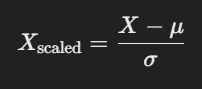
* X: Giá trị ban đầu.
* μ: Giá trị trung bình của tập dữ liệu.
* σ: Độ lệch chuẩn của tập dữ liệu.
* X_scaled: Giá trị sau khi chuẩn hóa với trung bình 0 và độ lệch chuẩn 1.

### Cú pháp
```python
# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chuẩn hóa cột 'HCM' và 'LA'
scaled = scaler.fit_transform(df[['HCM', 'LA']])

# Tạo DataFrame từ kết quả chuẩn hóa
scaled_df = pd.DataFrame(scaled, columns=df[['HCM', 'LA']].columns)

print(scaled_df)
```

## Ý nghĩa
StandardScaler biến đổi các giá trị sao cho dữ liệu có trung bình bằng 0 và độ lệch chuẩn bằng 1.
Giúp xử lý dữ liệu có phân phối Gaussian hoặc trong các bài toán cần chuẩn hóa các đặc trưng với độ lớn khác nhau.

In [28]:
# Chuẩn hóa dữ liệu tiêu chuẩn thủ công
# Long An
mean_la = df['LA'].mean()
std_la = df['LA'].std()
df['zLA'] = (df['LA'] - mean_la) / std_la
df

,Year,HCM,LA,macLA,mmcLA,zLA
0,2010,8.5,5.5,0.916667,0.5,-0.408248
1,2011,9.0,6.0,1.000000,1.0,0.816497
2,2012,10.5,6.0,1.000000,1.0,0.816497
3,2013,12.0,5.5,0.916667,0.5,-0.408248
4,2014,11.0,6.0,1.000000,1.0,0.816497
5,2015,10.0,5.0,0.833333,0.0,-1.632993


In [29]:
# Chuẩn hóa dữ liệu tiêu chuẩn thủ công
# HCM
mean_hcm = df['HCM'].mean()
std_hcm = df['HCM'].std()
df['zHCM'] = (df['HCM'] - mean_hcm) / std_hcm
df

,Year,HCM,LA,macLA,mmcLA,zLA,zHCM
0,2010,8.5,5.5,0.916667,0.5,-0.408248,-1.290994
1,2011,9.0,6.0,1.000000,1.0,0.816497,-0.903696
2,2012,10.5,6.0,1.000000,1.0,0.816497,0.258199
3,2013,12.0,5.5,0.916667,0.5,-0.408248,1.420094
4,2014,11.0,6.0,1.000000,1.0,0.816497,0.645497
5,2015,10.0,5.0,0.833333,0.0,-1.632993,-0.129099


In [30]:
# Chuẩn hóa dữ liệu tiêu chuẩn bằng thư viện (NÊN DÙNG)
# HCM, LA
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['HCM','LA']])
scaled_df = pd.DataFrame(scaled, columns=df[['HCM','LA']].columns)
scaled_df


,HCM,LA
0,-1.414214,-0.447214
1,-0.989949,0.894427
2,0.282843,0.894427
3,1.555635,-0.447214
4,0.707107,0.894427
5,-0.141421,-1.788854


# Chuẩn hóa X Raw (raw data normalization)
biến đổi dữ liệu theo một hàm f(x) bất kỳ

In [31]:
def funcX(x):
    return x*x + 1

df['TransformX'] = funcX(df[["LA"]])
df

,Year,HCM,LA,macLA,mmcLA,zLA,zHCM,TransformX
0,2010,8.5,5.5,0.916667,0.5,-0.408248,-1.290994,31.25
1,2011,9.0,6.0,1.000000,1.0,0.816497,-0.903696,37.00
2,2012,10.5,6.0,1.000000,1.0,0.816497,0.258199,37.00
3,2013,12.0,5.5,0.916667,0.5,-0.408248,1.420094,31.25
4,2014,11.0,6.0,1.000000,1.0,0.816497,0.645497,37.00
5,2015,10.0,5.0,0.833333,0.0,-1.632993,-0.129099,26.00


# Bài tập
* sinh viên tính vẽ biểu đồ phân phối lương trung bình của HCM
* tính skewness và kurtorsis của lương tb HCM
* sử dụng hàm log để transform dữ liệu - np.log
* vẽ biểu đồ phân phối của dữ liệu lương trung bình của HCM sau khi transform
* tính skewness và kurtorsis của dữ liệu lương trung bình của hcm sau khi transform
* hãy so sánh độ nghiêng, độ nhọn phân phối sau khi transform so với dữ liệu ban đầu